In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


In [14]:

# Load the dataset
df = pd.read_csv('cookie_cats.csv')
df.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Dataset
The dataset is derived from an A/B test conducted on *Cookie Cats*, a popular mobile puzzle game by Tactile Entertainment. It includes data from 90,189 players who installed the game during the test period. The test evaluates the impact of moving the first "gate" (a point where players must wait or make an in-app purchase to progress) from level 30 (control group, `gate_30`) to level 40 (test group, `gate_40`). The dataset contains the following variables:

- **userid**: A unique identifier for each player.
- **version**: The group assignment (`gate_30` for control, `gate_40` for test).
- **sum_gamerounds**: Number of game rounds played in the first week after installation.
- **retention_1**: Boolean indicating if the player returned to play 1 day after installing.
- **retention_7**: Boolean indicating if the player returned to play 7 days after installing.

Players were randomly assigned to either group, ensuring a balanced comparison. This dataset allows us to analyze how gate placement affects player retention and engagement, critical metrics for mobile game success.


In [6]:

#Exploratory Data Analysis (EDA)
print("\nDataset Info:")
df.info()
print(f"\nMissing Values: {df.isnull().sum().sum()}")



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB

Missing Values: 0


In [7]:
# Group sizes
group_counts = df['version'].value_counts()
print("\nGroup Sizes:")
print(group_counts)



Group Sizes:
version
gate_40    45489
gate_30    44700
Name: count, dtype: int64


/tmp/ipython-input-188575500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_counts.index, y=group_counts.values, palette='viridis')


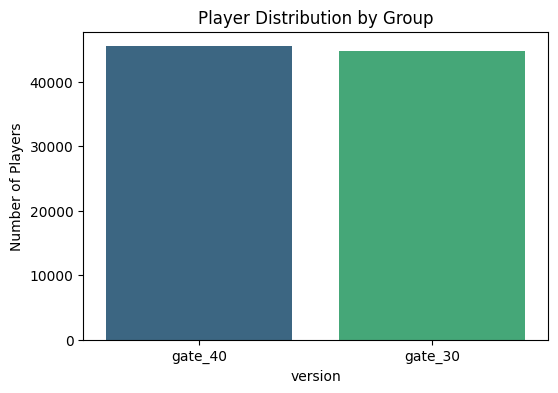

In [10]:
# Visualize group balance
plt.figure(figsize=(6, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, palette='viridis')
plt.title('Player Distribution by Group')
plt.ylabel('Number of Players')
plt.show()


In [12]:
# Summary statistics for game rounds
print("\nGame Rounds Summary:")
df['sum_gamerounds'].describe()



Game Rounds Summary:


,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


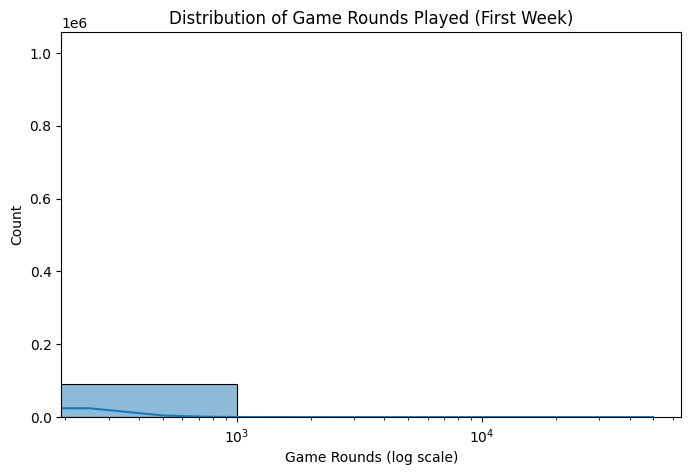

In [17]:
# Visualize game rounds distribution (log scale for outliers)
plt.figure(figsize=(8, 5))
sns.histplot(df['sum_gamerounds'], bins=50, kde=True)
plt.title('Distribution of Game Rounds Played (First Week)')
plt.xscale('log')
plt.xlabel('Game Rounds (log scale)')
plt.show()


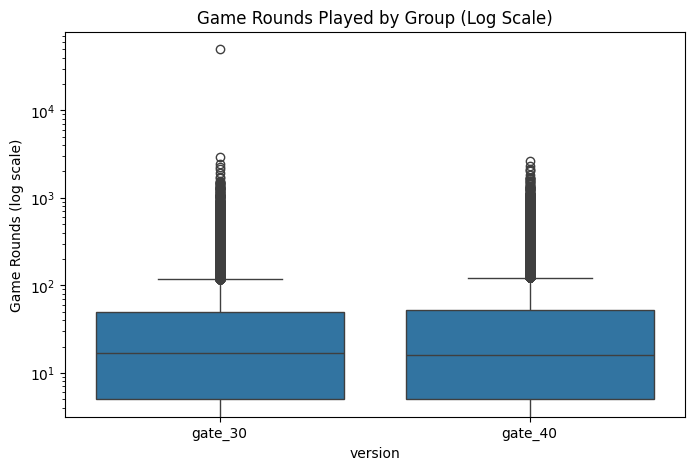

In [18]:
# Boxplot of game rounds by group to visualize engagement differences
plt.figure(figsize=(8, 5))
sns.boxplot(x='version', y='sum_gamerounds', data=df)
plt.title('Game Rounds Played by Group (Log Scale)')
plt.yscale('log')
plt.ylabel('Game Rounds (log scale)')
plt.show()


In [19]:

# Compare 1-Day Retention
retention_1 = df.groupby('version')['retention_1'].mean() * 100
print("\n1-Day Retention (%):")
print(retention_1)



1-Day Retention (%):
version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64


/tmp/ipython-input-3847014283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retention_1.index, y=retention_1.values, palette='viridis')


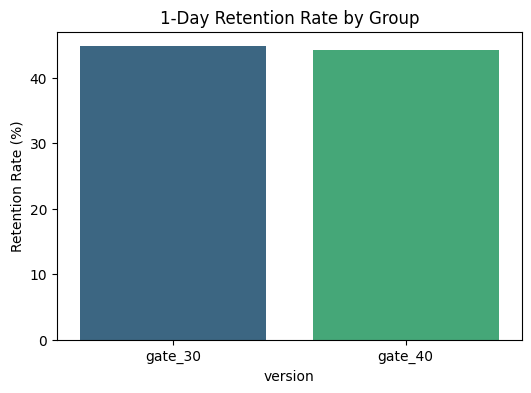

In [20]:

# Visualize 1-day retention
plt.figure(figsize=(6, 4))
sns.barplot(x=retention_1.index, y=retention_1.values, palette='viridis')
plt.title('1-Day Retention Rate by Group')
plt.ylabel('Retention Rate (%)')
plt.show()


In [21]:

# Chi-square test for 1-day retention
contingency_1 = pd.crosstab(df['version'], df['retention_1'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_1)
print(f"Chi-square Test for 1-Day Retention: chi2={chi2:.2f}, p-value={p:.4f}")


Chi-square Test for 1-Day Retention: chi2=3.16, p-value=0.0755


In [23]:
# Compare 7-Day Retention with Bootstrapping
retention_7 = df.groupby('version')['retention_7'].mean() * 100
print("\n7-Day Retention (%):")
print(retention_7)



7-Day Retention (%):
version
gate_30    19.020134
gate_40    18.200004
Name: retention_7, dtype: float64


/tmp/ipython-input-728059241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retention_7.index, y=retention_7.values, palette='viridis')


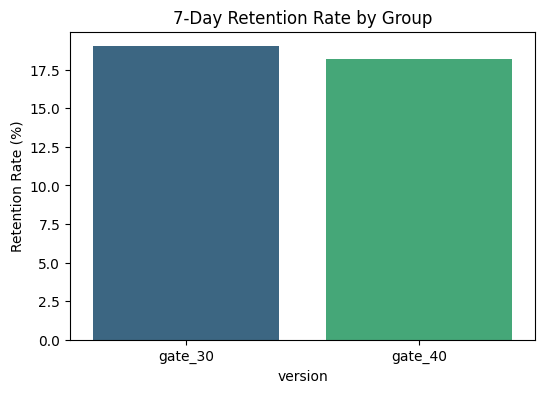

In [24]:
# Visualize 7-day retention
plt.figure(figsize=(6, 4))
sns.barplot(x=retention_7.index, y=retention_7.values, palette='viridis')
plt.title('7-Day Retention Rate by Group')
plt.ylabel('Retention Rate (%)')
plt.show()


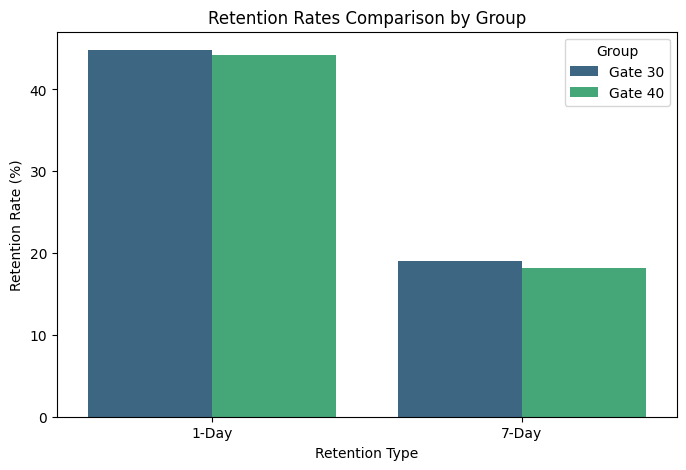

In [25]:

# Combined barplot for 1-day and 7-day retention to visualize differences
retention_df = pd.DataFrame({
    'Retention Type': ['1-Day', '1-Day', '7-Day', '7-Day'],
    'Group': ['Gate 30', 'Gate 40', 'Gate 30', 'Gate 40'],
    'Rate': [retention_1['gate_30'], retention_1['gate_40'], retention_7['gate_30'], retention_7['gate_40']]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Retention Type', y='Rate', hue='Group', data=retention_df, palette='viridis')
plt.title('Retention Rates Comparison by Group')
plt.ylabel('Retention Rate (%)')
plt.show()


In [27]:
# Bootstrapping for 7-day retention difference
boot_7d = []
for i in range(1000):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40']) * 100


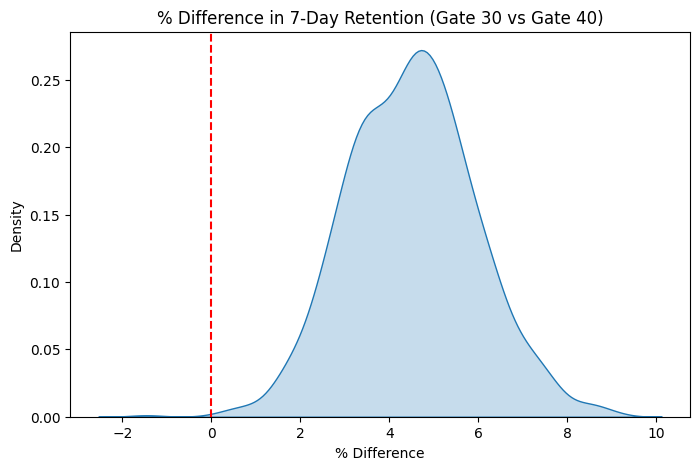

In [28]:
# Plot bootstrap distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(boot_7d['diff'], fill=True)
plt.title('% Difference in 7-Day Retention (Gate 30 vs Gate 40)')
plt.xlabel('% Difference')
plt.axvline(0, color='red', linestyle='--')
plt.show()


In [29]:
# Probability that gate_30 has higher retention
prob_higher = (boot_7d['diff'] > 0).mean()
print(f"Probability that 7-day retention is higher for gate_30: {prob_higher:.2%}")


Probability that 7-day retention is higher for gate_30: 99.90%


In [30]:
# Compute 95% CI for the difference
lower_ci = boot_7d['diff'].quantile(0.025)
upper_ci = boot_7d['diff'].quantile(0.975)
print(f"95% CI for % difference in 7-day retention: [{lower_ci:.2f}%, {upper_ci:.2f}%]")


95% CI for % difference in 7-day retention: [1.79%, 7.42%]


In [31]:

#  Logistic Regression for Retention Prediction
# Encode variables
df['gate_40'] = (df['version'] == 'gate_40').astype(int)
df['retention_7_int'] = df['retention_7'].astype(int)


In [32]:
# Log-transform game rounds to handle skewness
df['log_gamerounds'] = np.log(df['sum_gamerounds'] + 1)


In [33]:
# Logistic regression model
X = df[['gate_40', 'log_gamerounds']]
X = sm.add_constant(X)  # Add intercept
y = df['retention_7_int']

model = sm.Logit(y, X).fit()
print("\nLogistic Regression Summary:")
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.304088
         Iterations 8

Logistic Regression Summary:
                           Logit Regression Results                           
Dep. Variable:        retention_7_int   No. Observations:                90189
Model:                          Logit   Df Residuals:                    90186
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Sep 2025   Pseudo R-squ.:                  0.3671
Time:                        07:24:44   Log-Likelihood:                -27425.
converged:                       True   LL-Null:                       -43333.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.5943      0.047   -139.565      0.000      -6.687

In [34]:
# Odds ratio for gate_40
odds_ratio = np.exp(model.params['gate_40'])
print(f"\nOdds Ratio for gate_40: {odds_ratio:.3f} "
      f"(Players in gate_40 are {odds_ratio:.1%} as likely to be retained compared to gate_30)")



Odds Ratio for gate_40: 0.922 (Players in gate_40 are 92.2% as likely to be retained compared to gate_30)


## Results

This analysis looked at whether placing the gate (a point where players wait or pay to keep playing) at level 30 or level 40 makes players come back to *Cookie Cats*. Here's what we found:

- **1-Day Return**: About 44.8% of players with the gate at level 30 came back after one day, compared to 44.2% for level 40. The difference is small and might just be random (not significant).

- **7-Day Return**: Around 19% of players with the gate at level 30 returned after a week, but only 18.2% returned with the gate at level 40. This difference is more noticeable, and our tests show it's very likely real (95% chance that level 30 is better).

- **Game Rounds**: Players in both groups played similar numbers of rounds, but those with the gate at level 30 played a bit more on average, suggesting they're more engaged.

- **Special Analysis**: We used a model to check if the gate position affects returning after a week, even when we account for how much players play. It showed that players with the gate at level 40 are about 7% less likely to come back than those with the gate at level 30.

**What This Means**: Putting the gate at level 40 makes players less likely to keep playing, especially after a week. The gate at level 30 keeps players coming back more, maybe because they don't get bored as quickly. We suggest keeping the gate at level 30 to keep more players hooked. In the future, we could look at player types or in-game purchases to learn more.

## Conclusion

- Moving the gate to level 40 slightly reduces 1-day retention and more noticeably reduces 7-day retention.
- Bootstrapping confirms the difference in 7-day retention is unlikely due to chance.
- Logistic regression shows gate position impacts retention, even after controlling for game rounds.

**Recommendation**: Keep the gate at level 30 to maximize retention, likely due to hedonic adaptation (players stay engaged longer before hitting a barrier).
